In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
print(dataset.shape)
dataset.head()

(414, 9)


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
# Checking for null value in dataset
nan = dataset.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan))

Number of NaN values present: 0


In [4]:
# Features statistics.
dataset.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


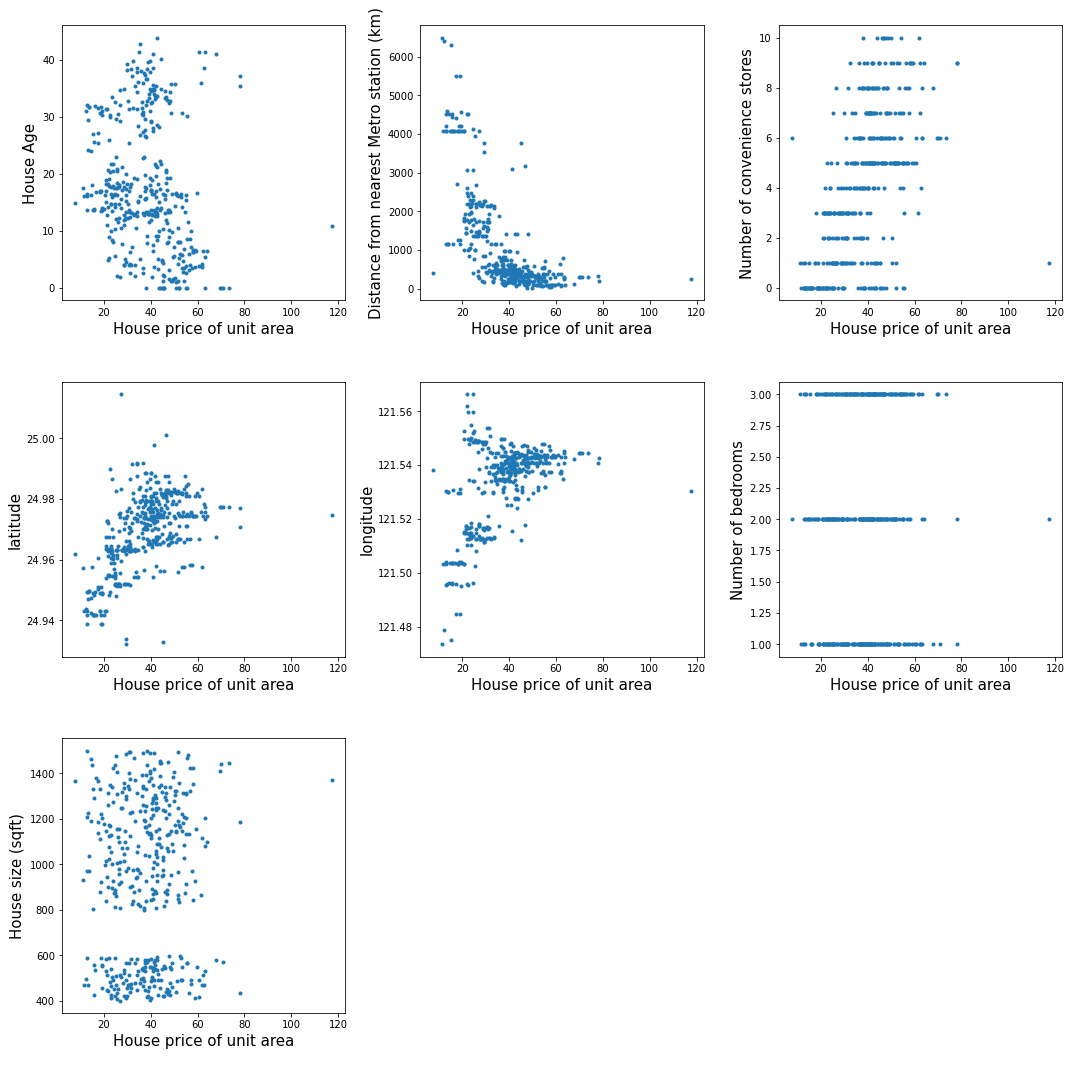

In [5]:
# Features and House price Scatter Plot

plt.figure(figsize=(15,15))

features = ['House Age',
'Distance from nearest Metro station (km)'
,'Number of convenience stores'
,'latitude'
,'longitude'
,'Number of bedrooms'
,'House size (sqft)']

for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    plt.scatter(dataset['House price of unit area'], dataset[f'{feature}'], marker= '.', label=feature)
    plt.ylabel(feature, fontdict={'fontsize':15})
    plt.xlabel('House price of unit area\n\n',fontdict={'fontsize':15})
    
plt.tight_layout()
plt.show()


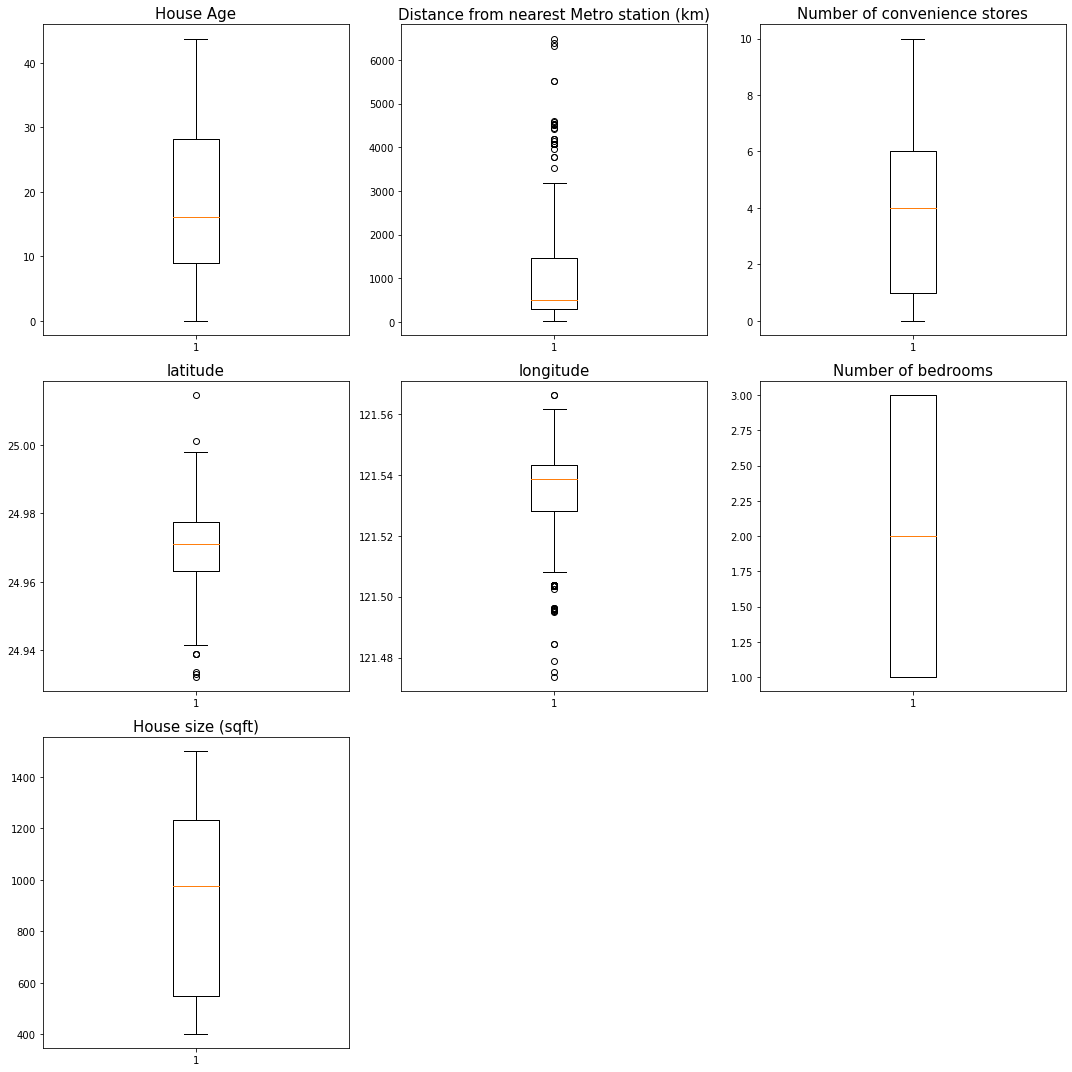

In [6]:
# Outliers check for all features 

plt.figure(figsize=(15,15))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    plt.boxplot(dataset[f'{feature}'])
    plt.title(feature,  fontdict={'fontsize':15})

    
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>]],
      dtype=object)

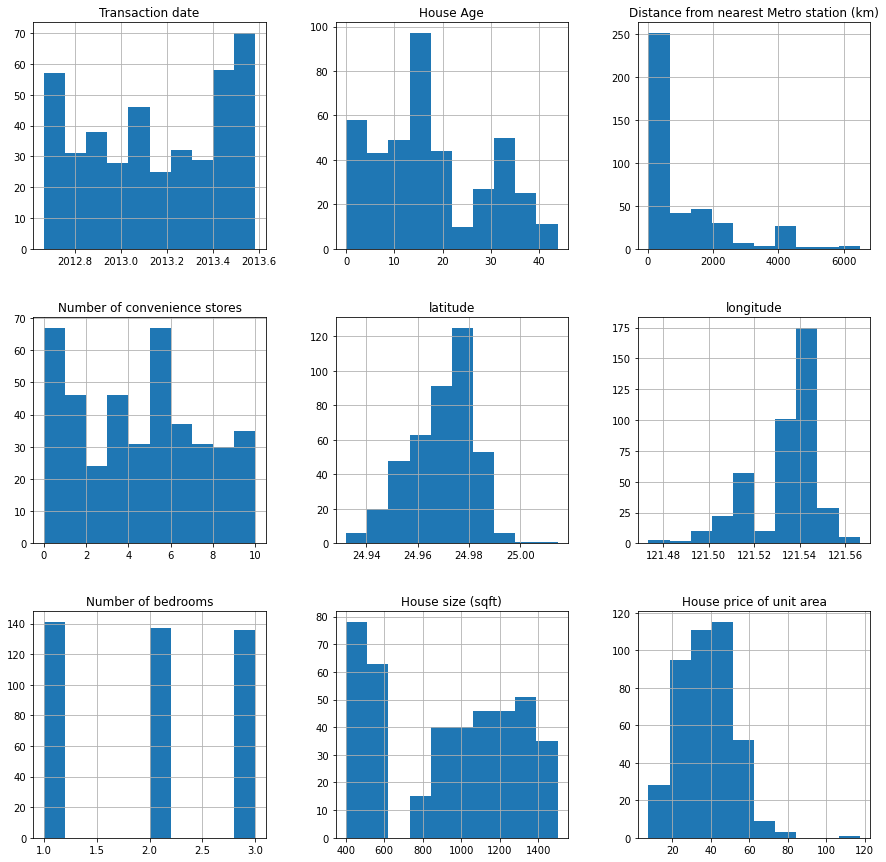

In [7]:
# Frequency graph data visualization

dataset.hist(figsize=(15,15))

<AxesSubplot:>

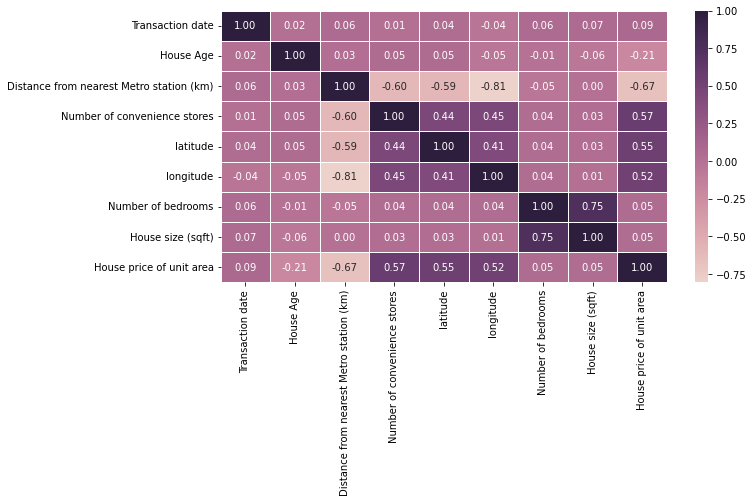

In [8]:
# Features Correlation Chart

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(dataset.corr(),
            cmap = sns.cubehelix_palette(as_cmap=True),
            fmt = '.2f',
            linewidths = 1,
            annot = True)

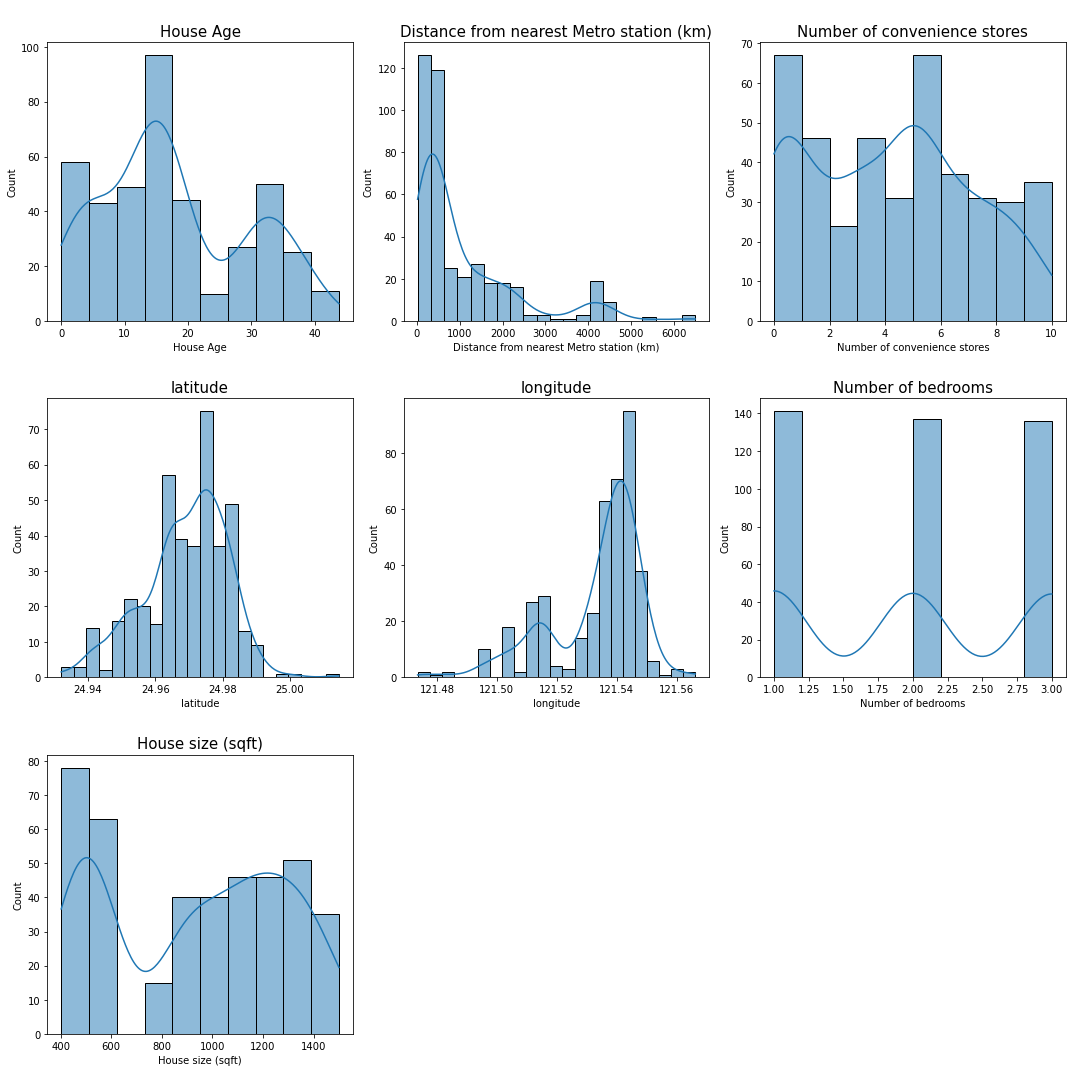

In [9]:
# Checking feature distribution with kde plot

plt.figure(figsize=(15,15))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(dataset[f'{feature}'], kde=True)    
    plt.title(f'\n{feature}',  fontdict={'fontsize':15})
    
plt.tight_layout()
plt.show()

In [10]:
X = dataset.iloc[:, 1:-1].values # Excluded 'Transaction date' due to ita correlation with house price
X

array([[3.2000000e+01, 8.4878820e+01, 1.0000000e+01, ..., 1.2154024e+02,
        1.0000000e+00, 5.7500000e+02],
       [1.9500000e+01, 3.0659470e+02, 9.0000000e+00, ..., 1.2153951e+02,
        2.0000000e+00, 1.2400000e+03],
       [1.3300000e+01, 5.6198450e+02, 5.0000000e+00, ..., 1.2154391e+02,
        3.0000000e+00, 1.0600000e+03],
       ...,
       [1.8800000e+01, 3.9096960e+02, 7.0000000e+00, ..., 1.2153986e+02,
        1.0000000e+00, 5.0300000e+02],
       [8.1000000e+00, 1.0481010e+02, 5.0000000e+00, ..., 1.2154067e+02,
        1.0000000e+00, 5.9700000e+02],
       [6.5000000e+00, 9.0456060e+01, 9.0000000e+00, ..., 1.2154310e+02,
        2.0000000e+00, 1.0970000e+03]])

In [11]:
Y = dataset.iloc[:,-1].values
Y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

[[-0.07552232  0.94057325 -0.35081487 ... -1.28125172  1.25111844
   0.36145855]
 [-1.13888517  0.93091517 -0.35081487 ... -1.41804531  0.02952492
   1.6014433 ]
 [ 1.85625352 -0.53058532 -1.38452158 ...  0.07616157  0.02952492
   0.6191921 ]
 ...
 [-0.33250168  2.46031475 -1.38452158 ... -1.92312932  1.25111844
   0.79960558]
 [ 1.64358095 -0.3705762  -0.35081487 ...  0.26819872  1.25111844
  -0.1740545 ]
 [-0.95279667 -0.80857511  1.71659857 ...  0.6595073   1.25111844
  -0.24564715]]
[[-0.62492646 -0.71227189 -1.03995268  0.40965345 -0.2026869  -1.1920686
  -1.44267632]
 [ 0.58907946  2.72324795 -1.38452158 -1.69780056 -2.41966374  0.02952492
   1.52985065]
 [ 1.51952196 -0.62193563  0.68289185  0.72230638  0.56743469  0.02952492
  -0.13682632]
 [ 0.73086117  2.71688273 -1.38452158 -1.63085975 -2.44662786 -1.1920686
  -1.4369489 ]
 [-0.26161082 -0.74527763 -1.03995268  0.37185158 -0.21584013  1.25111844
   1.08024878]
 [ 1.70561045 -0.49149707  1.37202966  0.09306283  0.78051701  0.

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

res= []

In [15]:
modelLR = LinearRegression()
modelLR.fit(X_train, Y_train)
Y_pred = modelLR.predict(X_test)

acc= 100-mean_absolute_percentage_error(Y_test, Y_pred)*100
res.append(acc)

print('The accuracay of Linear Regression model is: %.2f'% acc+'%')

The accuracay of Linear Regression model is: 83.14%


In [16]:
modelPR = PolynomialFeatures(degree = 10)
xPoly = modelPR.fit_transform(X_train)

modelPLR = LinearRegression()
modelPLR.fit(xPoly, Y_train)

Y_pred = modelPLR.predict(modelPR.fit_transform(X_test))

acc= 100-mean_absolute_percentage_error(Y_test, Y_pred)
res.append(acc)

print('The accuracay of Polynomial Regression model is: %.2f'%acc+'%')

The accuracay of Polynomial Regression model is: 20.50%


In [17]:
modelRFR = RandomForestRegressor(n_estimators=5)
modelRFR.fit(X_train, Y_train)
Y_pred = modelRFR.predict(X_test)
 
acc= 100-mean_absolute_percentage_error(Y_test, Y_pred)*100
res.append(acc)

print('The accuracay of Random Forest Regressor model is: %.2f'%acc+'%')

The accuracay of Random Forest Regressor model is: 84.72%


In [18]:
modelSVR = svm.SVR()
modelSVR.fit(X_train,Y_train)
Y_pred = modelSVR.predict(X_test)
 
acc= 100-mean_absolute_percentage_error(Y_test, Y_pred)*100
res.append(acc)

print('The accuracay of Support vector Machine model is: %.2f'%acc+'%')

The accuracay of Support vector Machine model is: 80.67%


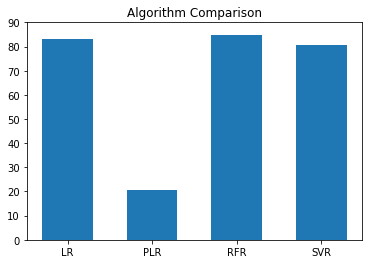

The best model for the given dataset is RFR model with 84.72% accuracy


In [22]:
models = ['LR','PLR','RFR','SVR']
plt.ylim(0, 90)
plt.bar(models, res, width = 0.6)

plt.title('Algorithm Comparison')
plt.show()
print(f'The best model for the given dataset is {models[res.index(max(res))]} model with {max(res):.2f}% accuracy')